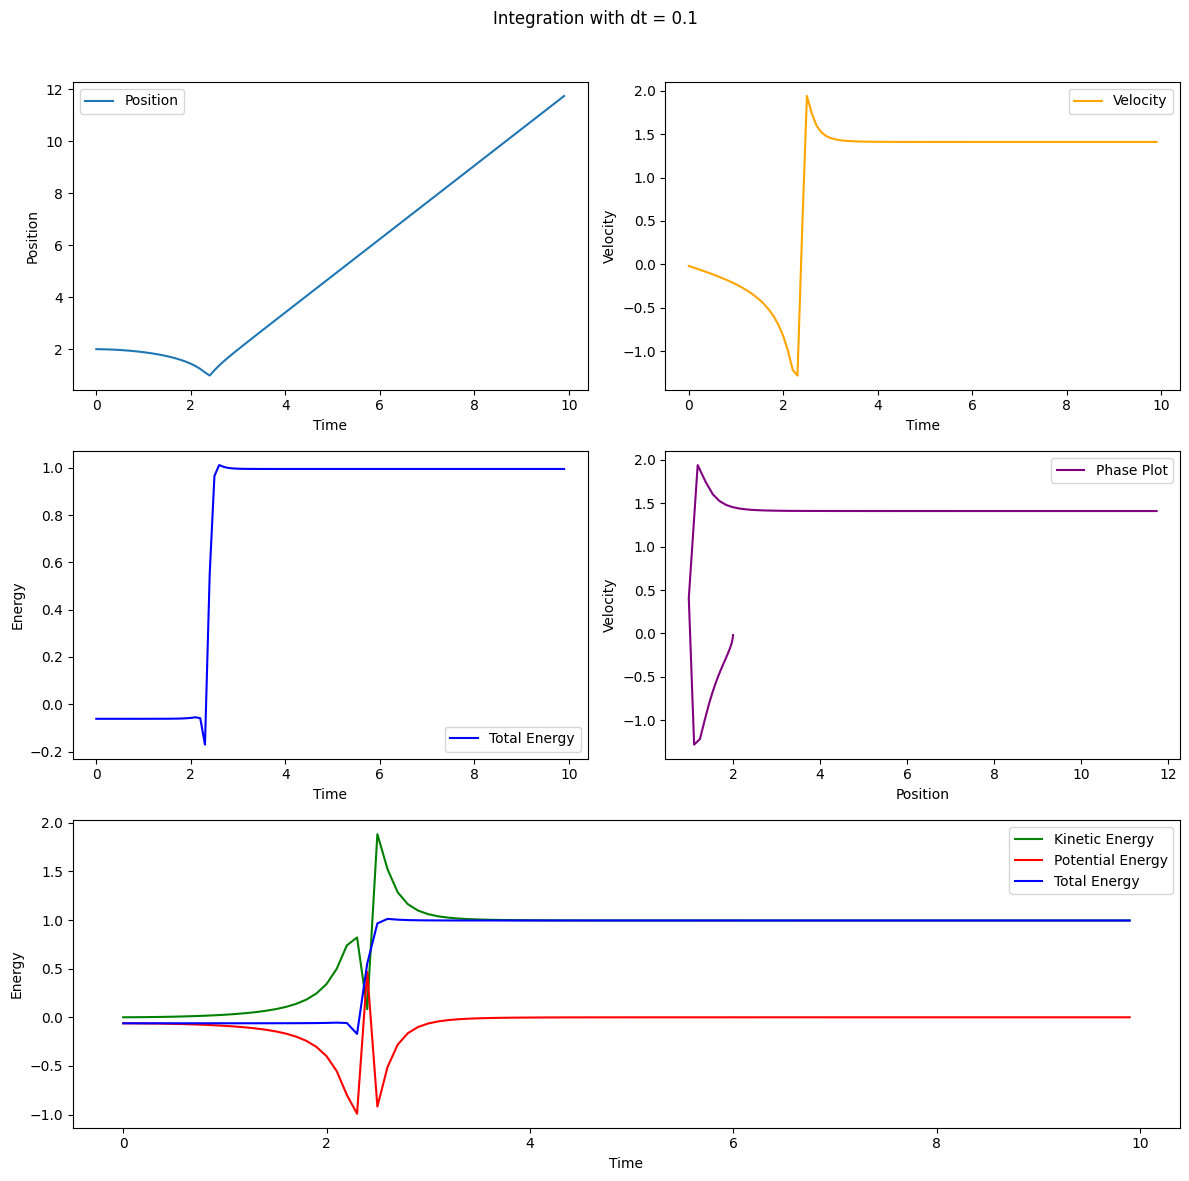

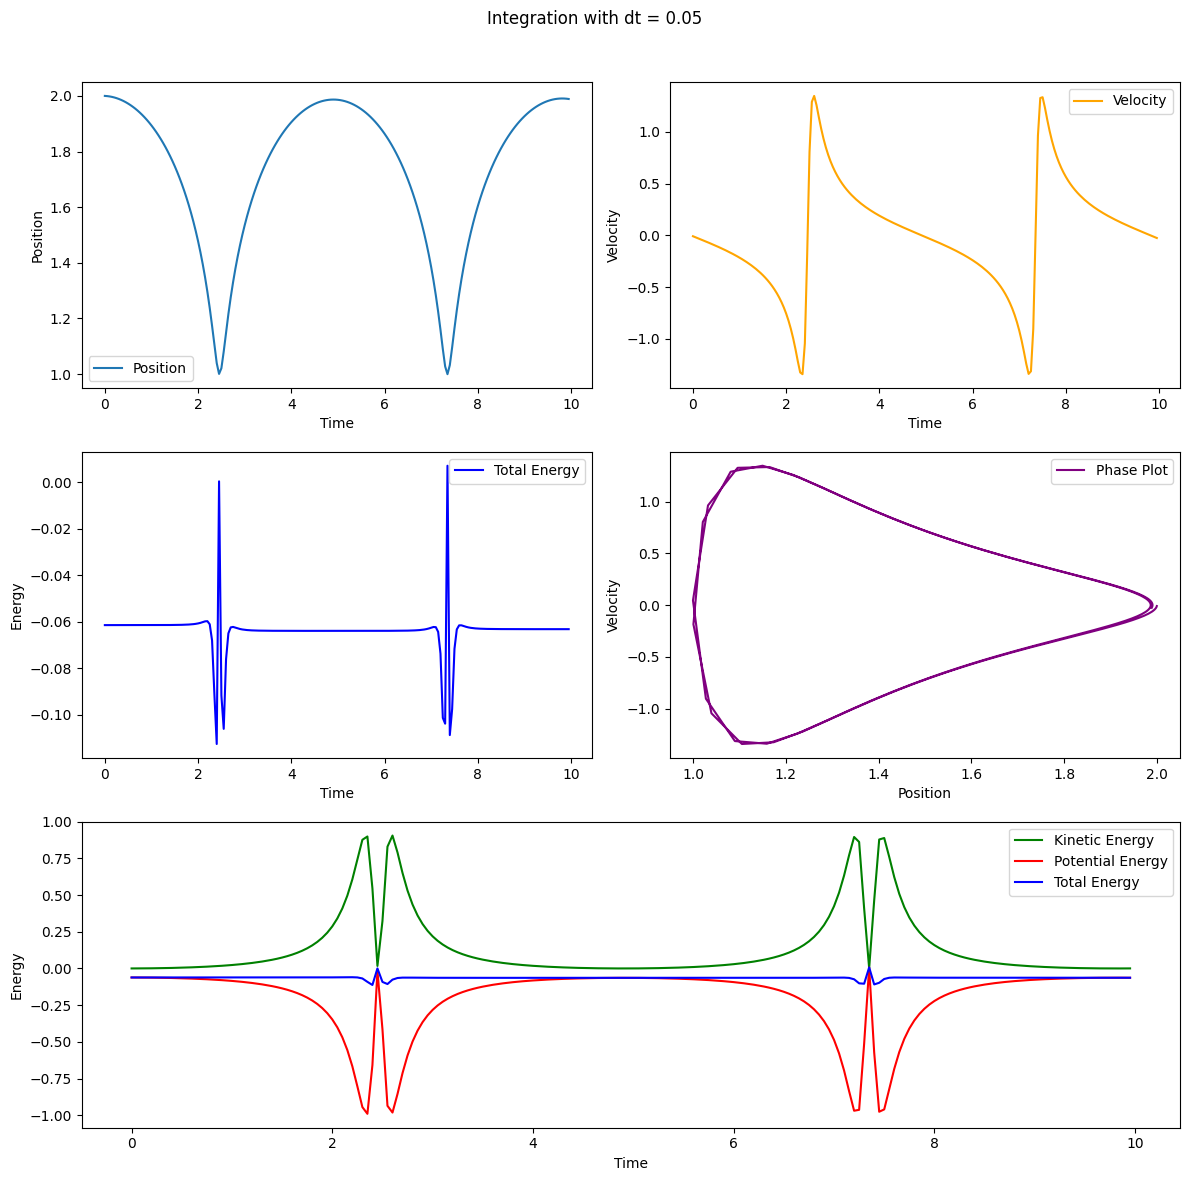

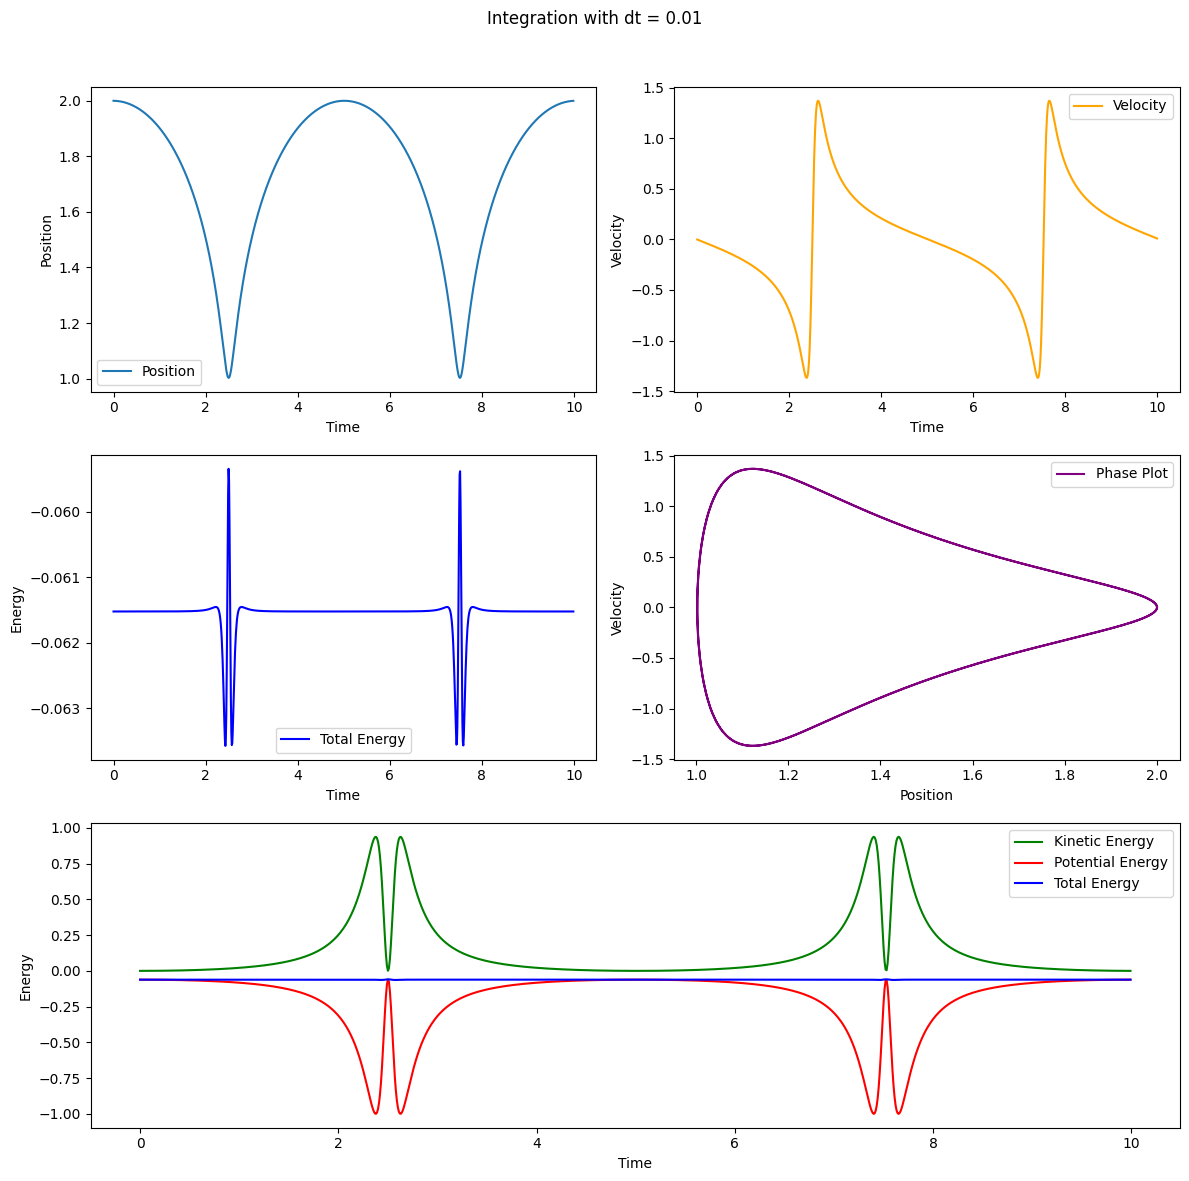

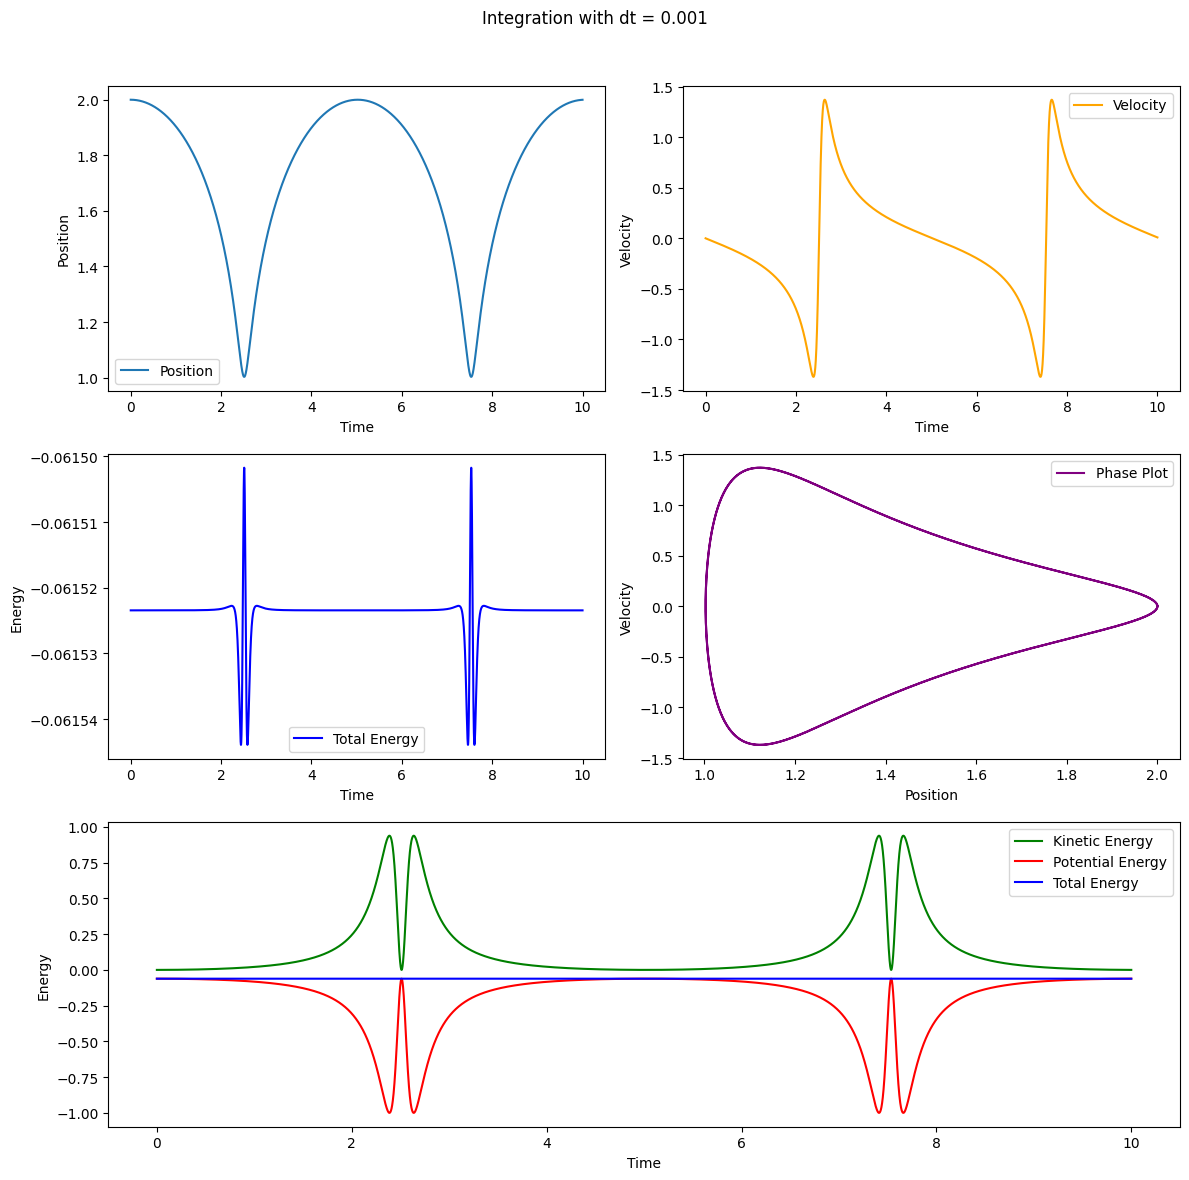

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def lennard_jones_potential(x):
    return 4 * ((1 / x)**12 - (1 / x)**6)

def force(x):
    return -4 * (-12 * (1 / x)**13 + 6 * (1 / x)**7)

def verlet(x, v, a, dt):
    x_new = x + v * dt + 0.5 * a * dt**2
    a_new = force(x_new)
    v_new = v + 0.5 * (a + a_new) * dt
    return x_new, v_new, a_new

x_0 = 2
v_0 = 0.0
m = 1.0

dt_values = [0.1, 0.05, 0.01, 0.001]
t_max = 10.0

for dt in dt_values:
    t = np.arange(0, t_max, dt)
    
    x_values = []
    v_values = []
    a_values = []
    kinetic_energy = []
    potential_energy = []
    total_energy = []
    
    x = x_0
    v = v_0
    a = force(x) / m
    
    for _ in t:
        x, v, a = verlet(x, v, a, dt)
        x_values.append(x)
        v_values.append(v)
        a_values.append(a)
        kinetic_energy.append(0.5 * m * v**2)
        potential_energy.append(lennard_jones_potential(x))
        total_energy.append(0.5 * m * v**2 + lennard_jones_potential(x))
    
    plt.figure(figsize=(12, 12))
    plt.suptitle(f"Integration with dt = {dt}")
    
    plt.subplot(3, 2, 1)
    plt.plot(t, x_values, label='Position')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend()
    
    plt.subplot(3, 2, 2)
    plt.plot(t, v_values, label='Velocity', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.legend()
    
    plt.subplot(3, 2, 3)
    plt.plot(t, total_energy, label='Total Energy', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.legend()
    
    plt.subplot(3, 2, 4)
    plt.plot(x_values, v_values, label='Phase Plot', color='purple')
    plt.xlabel('Position')
    plt.ylabel('Velocity')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t, kinetic_energy, label='Kinetic Energy', color='green')
    plt.plot(t, potential_energy, label='Potential Energy', color='red')
    plt.plot(t, total_energy, label='Total Energy', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()